In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('./data/Reviews.csv')
data.head(3)
#data.describe()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


Data Cleaning

In [3]:
#data[data.isnull()]
#data.fillna
#data[data.notnull()]
#data.dropna
data.shape

(568454, 10)

In [4]:
data2 = data.dropna(how='all', axis=1)#all of them shoud be null
#data2 = data.dropna(thresh=2)#have two null in satr
data2.shape

(568454, 10)

In [5]:
#با میانگین سه تا همسایه ش پر میکند
import sklearn.impute as sk
fifi = sk.KNNImputer(n_neighbors=3)
pd.DataFrame(fifi.fit_transform(data[['HelpfulnessNumerator']]))

,0
0,1.0
1,0.0
2,1.0
3,3.0
4,0.0
...,...
568449,0.0
568450,0.0
568451,2.0
568452,1.0


In [6]:
#data.fillna(0)
data.fillna({'HelpfulnessDenominator' : 0})
data.fillna(data.min)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


Data Transformation

In [7]:
data.duplicated()#موارد تکراری
data.drop_duplicates()
data.drop_duplicates(keep='last')#اولی رو حذف میکنه و اخری رو نگه میدارد

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [8]:
lowerdata = data['ProfileName'].str.lower()
x = {'delmartian': 'first',
 'dll pa' : 'second'
 }
lowerdata = lowerdata.map(x)
lowerdata.unique()

array(['first', 'second', nan], dtype=object)

In [9]:
data.rename(columns={'UserId' : 'Iddd'})

,Id,ProductId,Iddd,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [10]:
data['Score'].unique()
bin = [2, 4, 6]
cutting = pd.cut(data['Score'], bins=bin)
cutting.value_counts()

Score
(4, 6]    363122
(2, 4]    123295
Name: count, dtype: int64

In [11]:
lis = np.random.rand(20)
ct = pd.cut(lis, 4, precision=2)#تعداد رقم اعشا
ct.value_counts()
pd.qcut(lis, 4).value_counts()#-->به پیمانه های هم اندازه تقسیم میکنه

(0.0289, 0.15]    5
(0.15, 0.336]     5
(0.336, 0.724]    5
(0.724, 0.913]    5
Name: count, dtype: int64

Detecting and Filtering Outliers

(array([     1,      3,     12, ..., 568435, 568446, 568450], dtype=int64),)

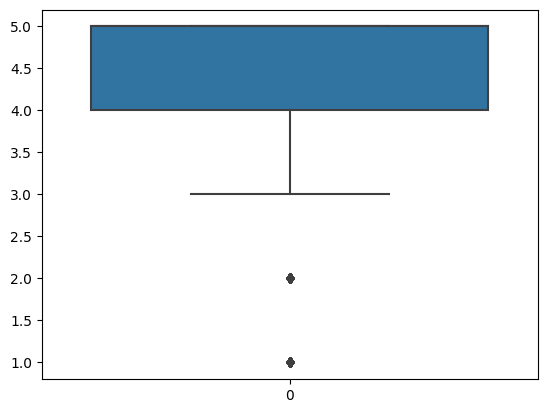

In [12]:
#boxplot
import seaborn as sn
sn.boxplot(data['Score'])
np.where(data['Score'] <= 3.0)

In [17]:
#IQR
Q1 = data['Score'].quantile(0.25)
Q3 = data['Score'].quantile(0.75)
IQR = Q3 - Q1
upper = IQR + Q3 * 1.5
lower = IQR - Q1 * 1.5
upper_array = np.where(data['Score'] >= upper)[0]
lower_array = np.where(data['Score'] <= lower)[0]
data.drop(index=upper_array, inplace=True)
data.drop(index=lower_array, inplace=True)
data.shape


(568454, 10)